# 스타일
#### seaborn 임포트 -> matplotlib에서 제공하는 기본 스타일이 아닌 seaborn에서 지정한 디폴트 스타일 집합으로 변경. 즉, 동일한 matplotlib 명령을 수행해도 Seaborn을 임포트 하기 전과 플롯 모양이 다르다
### set : 스타일 / set_color_codes : 기본 색상 변경

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_color_codes()

# 1차원 분포 플롯 
### >> 1차원 데이터는 실 수 값이면 히스토그램등의 실수 분포 플롯 / 카테고리 값이면 카운트 플롯으로 나타낸다.

In [3]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

## 1. 실수 분포 플롯 
#### 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등 제공
#### rugplot(데이터 위치를 x축 위에 작은 선분으로 나타내어 실제 데이터 분포를 보여줌), kdeplot, displot, jointplot, pairplot
#### 커널 밀도(kernel density)는 커널이라고 하는 단위 플롯을 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여준다. 커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.
#### seaborn의 distplot 명령은 matplotlib의 히스토그램 명령을 대체하여 많이 쓰인다. 러그와 커널 밀도 표시 기능도 가지고 있다.

In [6]:
np.random.seed(0)
x = np.random.randn(100)

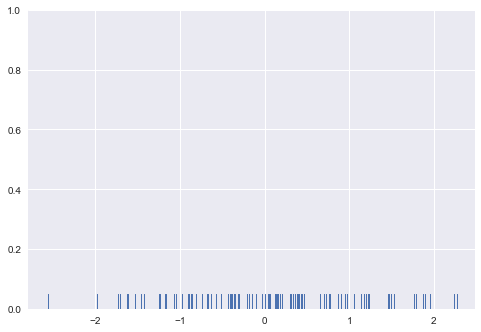

In [10]:
sns.rugplot(x)
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


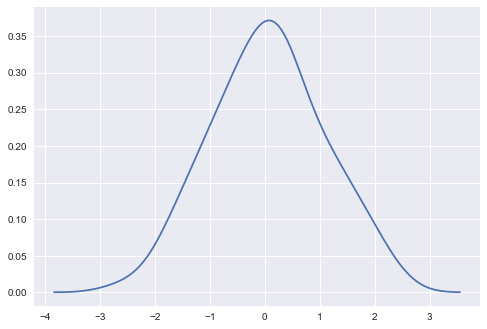

In [11]:
sns.kdeplot(x)
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


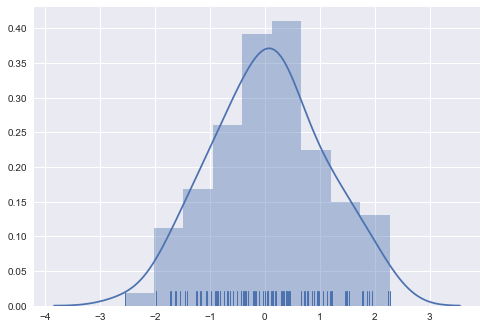

In [12]:
sns.distplot(x, kde=True, rug=True)
plt.show()

## 카운트 플롯 : countplot

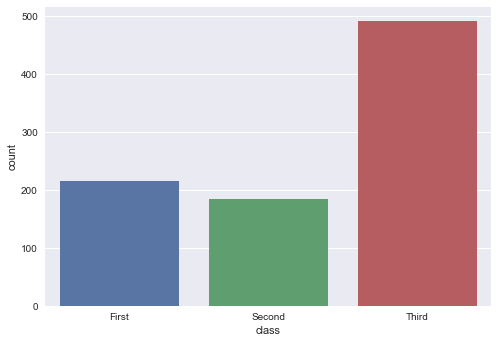

In [13]:
sns.countplot(x="class", data=titanic)
plt.show()

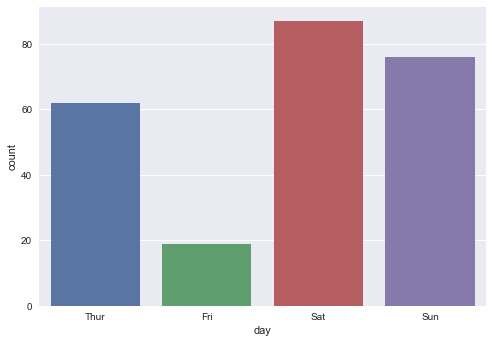

In [14]:
sns.countplot(x="day", data=tips)
plt.show()

# 다차원 데이터
### 1. 모두 실수값인 경우
### 2. 모두 카테고리 값인 경우
### 3. 모두 실수 값과 카테고리 값이 섞여 있는 경우

## 1. 2차원 실수형 데이터
#### >> 스캐터 플롯(scatter plot) : jointplot(스캐터 플롯 + 히스토그램, 인수를 바꿀 경우 커널 밀도의 형태로도 표시할 수 있다.)

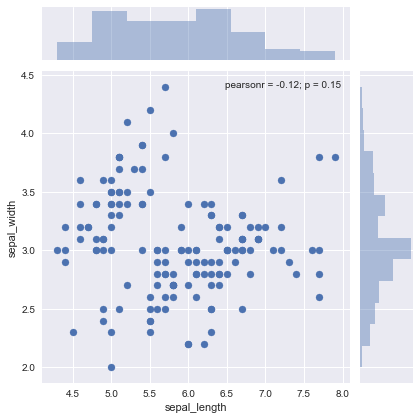

In [18]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


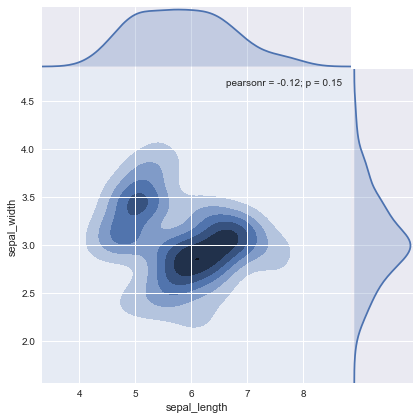

In [19]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde", space=0, zorder=0, n_levels=6)
plt.show()

## 2. 다차원 실수형 데이터
#### pairplot : 3차원 이상의 데이터에 사용. 그리드(grid)형태로 각 집합의 조합에 대해 히스토그램과 스캐터 플롯을 그린다. hue 인수 사용 -> 카테고리 별로 색상을 다르게 할 수 있다.

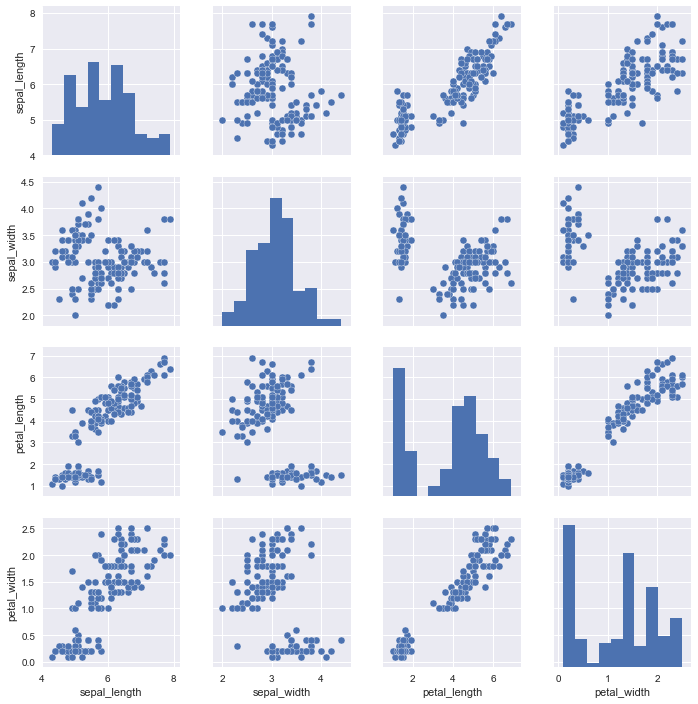

In [20]:
sns.pairplot(iris)
plt.show()

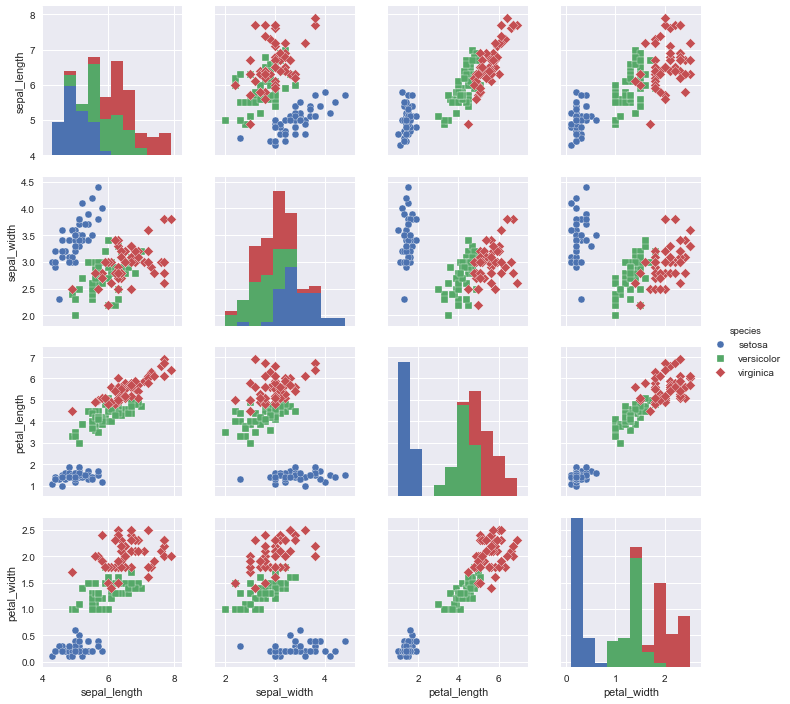

In [21]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.show()

## 3. 2차원 카테고리 데이터 : heatmap

In [22]:
titanic_size = titanic.pivot_table(index="class", columns="embark_town", aggfunc="size")
titanic_size

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


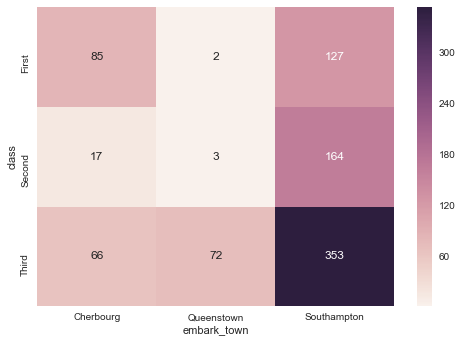

In [23]:
sns.heatmap(titanic_size, annot=True, fmt="d")
plt.show()

## 4. 2차원 복합 데이터
#### >> barplot, boxplot, pointplot, violinplot, stripplot, swarmplot

### 1) barplot : 카테고리 값에 따른 실수 값의 평균과 표준편차를 표시하는 기본적인 바 차트를 생성

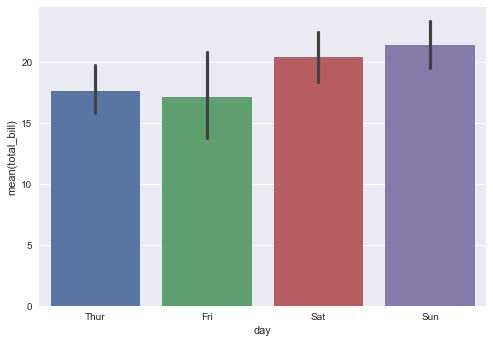

In [24]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.show()

### 2) boxplot : 박스-휘스커 플롯(Box-whisker Plot)을 그려준다. 

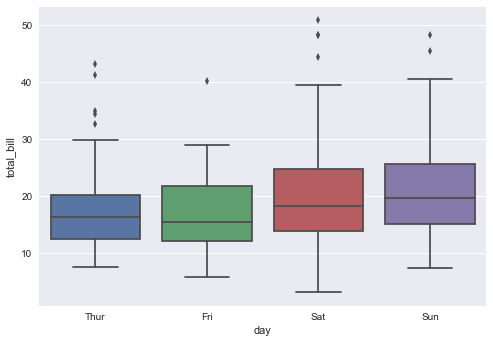

In [25]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

### 3) violinplot, stripplot. swarmplot 등 : 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다. /  split 옵션으로 시각화 방법을 변경할 수도 있다.

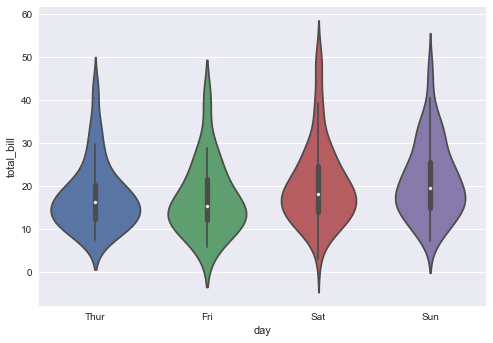

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

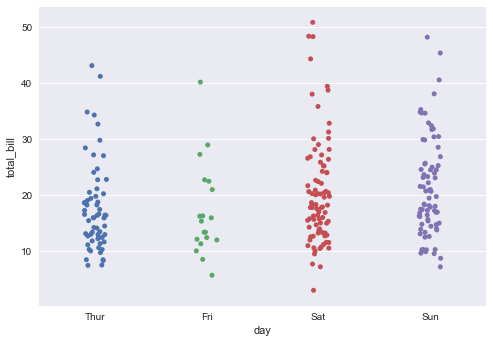

In [28]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.show()

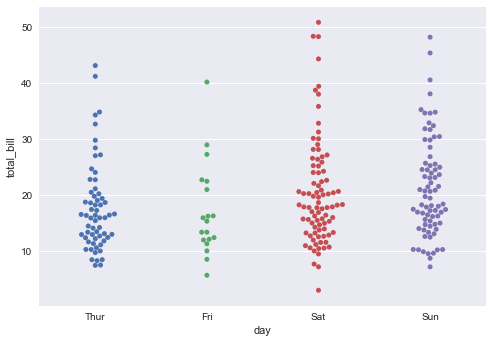

In [30]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.show()

## 5. 다차원 복합 데이터

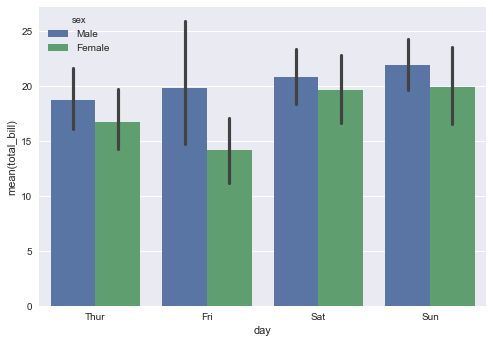

In [31]:
tips = sns.load_dataset("tips")
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

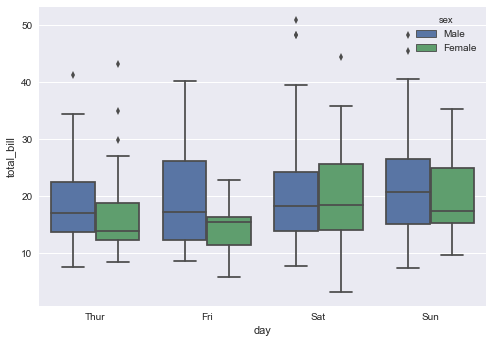

In [32]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

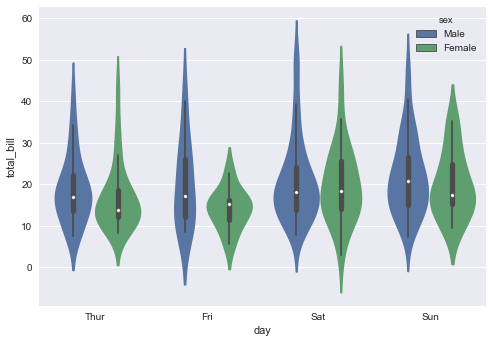

In [33]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

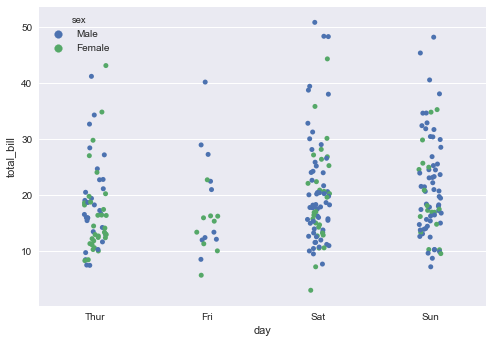

In [34]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.show()

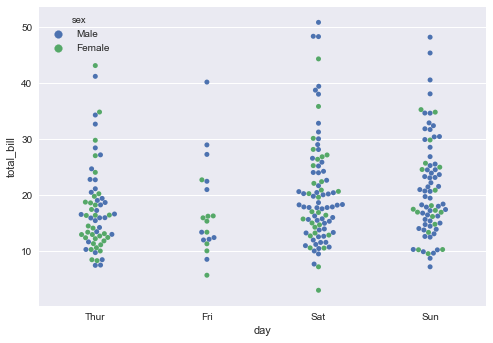

In [35]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.show()

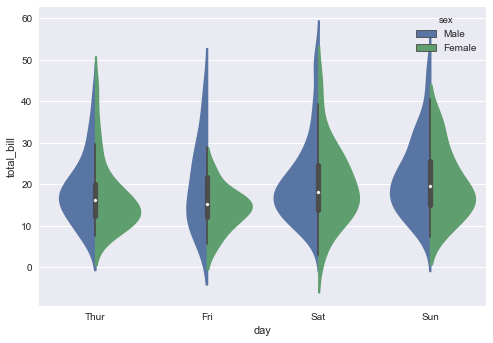

In [36]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.show()

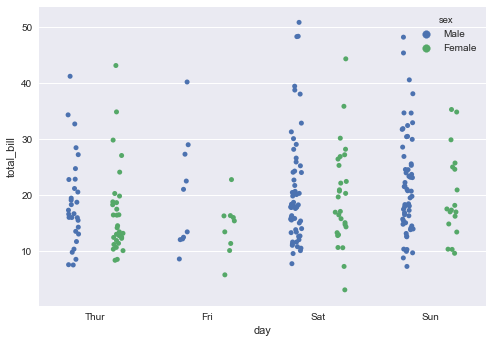

In [37]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True, split=True)
plt.show()

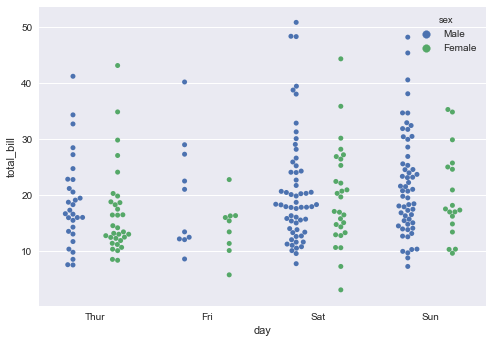

In [38]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.show()

### heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.

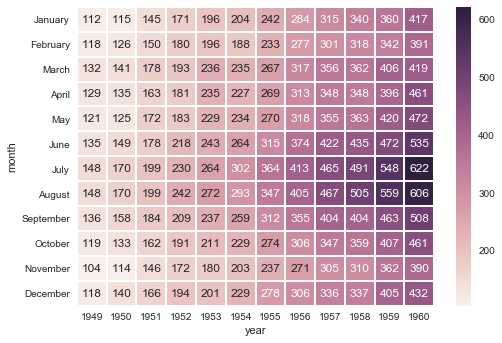

In [39]:
flights_passengers = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidth=1)
plt.show()

## 6. factorplot
#### >> 색상(hue)과 행(row)등을 동시에 사용하여 3개 이상의 카테고리 값에 의한 분포 변화를 보여준다

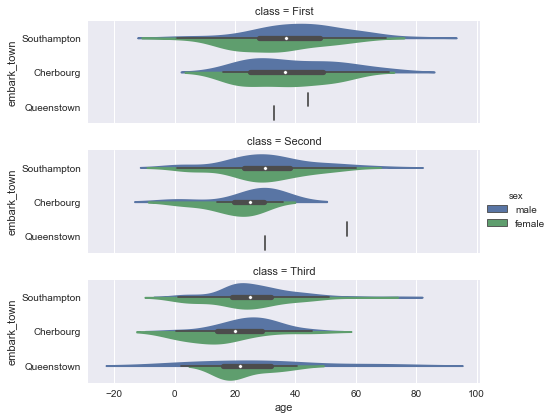

In [40]:
sns.factorplot(x="age", y="embark_town", hue="sex", row="class", data=titanic[titanic.embark_town.notnull()],
               size=2, aspect=3.5, kind="violin", split=True)
plt.show()

# 기타

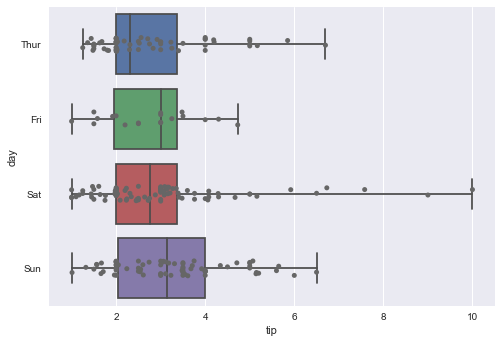

In [41]:
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

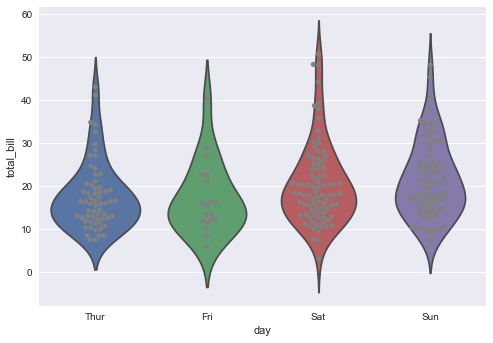

In [42]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.5")
plt.show()